# MMClassification Python 教程

在本教程中会介绍如下内容：

* 如何安装 MMCls
* 如何基于预训练模型进行推理计算
* 如何基于预训练模型进行模型微调 

## 安装 MMClassification

在使用 MMClassification 之前，我们需要配置环境，步骤如下：

- 安装 Python, CUDA, C/C++ compiler 和 git
- 安装 PyTorch (CUDA 版)
- 安装 mmcv
- 克隆 mmcls github 代码库然后安装

因为我们在 Google Colab 进行实验，Colab 已经帮我们完成了基本的配置，我们可以直接跳过前面两个步骤 。

### 检查环境

In [1]:
!pwd

/content


In [2]:
!cd /content

In [3]:
!pwd

/content


In [4]:
%cd /content

/content


In [5]:
!pwd

/content


In [6]:
# Check nvcc version
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [7]:
# Check GCC version
!gcc --version

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [8]:
# Check PyTorch installation
import torch, torchvision
print(torch.__version__)
print(torch.cuda.is_available())

1.9.0+cu102
True


In [9]:
# !pip install torch==1.8.0+cu110 -f https://download.pytorch.org/whl/torch_stable.html

### 安装 MMCV

MMCV 是 OpenMMLab 代码库的基础库。Linux 环境的安装 whl 包已经提前打包好，大家可以直接下载安装。

需要注意 PyTorch 和 CUDA 版本的，确保能够正常安装。

在前面的步骤中，我们输出了环境中 CUDA 和 PyTorch 的版本，分别是 11.0 和 1.8.1，我们需要选择相应的 MMCV 版本。

In [10]:
# Install mmcv
!pip install mmcv -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.8.1/index.html
# !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.8.1/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu101/torch1.8.1/index.html
     |████████████████████████████████| 317kB 26.6MB/s 
     |████████████████████████████████| 194kB 45.3MB/s 
  Created wheel for mmcv: filename=mmcv-1.3.8-py2.py3-none-any.whl size=451082 sha256=1c6aabdb809df4ae30e79c74ec8eb72c4f8c1a95b4030347c7892c790a3bce9c
  Stored in directory: /root/.cache/pip/wheels/76/7b/74/1e14a94111277a02048cfa3b6662cc87d153462dcf468ab3e5
Successfully built mmcv


### 克隆并安装 MMCls

接着，我们从 github 上克隆下 mmcls 代码库并进行安装。

In [11]:
# Install mmcls
!git clone https://github.com/open-mmlab/mmclassification.git

Cloning into 'mmclassification'...
remote: Enumerating objects: 2987, done.
remote: Counting objects: 100% (1279/1279), done.
remote: Compressing objects: 100% (540/540), done.
remote: Total 2987 (delta 992), reused 806 (delta 737), pack-reused 1708
Receiving objects: 100% (2987/2987), 2.76 MiB | 17.35 MiB/s, done.
Resolving deltas: 100% (1900/1900), done.


In [12]:
%cd mmclassification/

/content/mmclassification


In [13]:
!ls

configs  docs_zh-CN   model-index.yml  requirements.txt  tests
demo	 LICENSE      README.md        resources	 tools
docker	 MANIFEST.in  README_zh-CN.md  setup.cfg
docs	 mmcls	      requirements     setup.py


In [14]:
!pip install -e . 

Obtaining file:///content/mmclassification
  Running setup.py develop for mmcls


In [15]:
# Check MMClassification installation
import mmcls
print(mmcls.__version__)

0.13.0


## 使用 MMCls 预训练模型

MMCls 提供很多预训练好的模型，可以访问链接查看 [model zoo](https://github.com/open-mmlab/mmclassification/blob/master/docs/model_zoo.md).
这些模型都已经在 ImageNet 数据集上获得了 state-of-the-art 的结果。
我们能够直接使用这些模型进行推理计算。

在使用预训练模型之前，我们需要进行如下操作:

- 准备模型
  - 准备 config 配置文件 
  - 准备模型权重参数文件
- 构建模型
- 进行推理计算. 

获取示例图片

In [ ]:
!wget https://www.dropbox.com/s/k5fsqi6qha09l1v/banana.png?dl=0 -O demo/banana.png

--2021-04-19 12:28:07--  https://www.dropbox.com/s/k5fsqi6qha09l1v/banana.png?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/k5fsqi6qha09l1v/banana.png [following]
--2021-04-19 12:28:07--  https://www.dropbox.com/s/raw/k5fsqi6qha09l1v/banana.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd434f4185e3bb48f9462da10b4.dl.dropboxusercontent.com/cd/0/inline/BM6tXv57_DdcZq_H4mfzjPTsCri5Y32VMjKGY3XXmP9bbClHvCXSA45G7yYg2lPmvCI_aax_XlV8zX5oQsWKwdFQOXb0yGHdy_ZmbGrQmbFThpPmtJpAlHF_3QtciQwqwevRMZqZYLiKUPq41nGi4h90/file# [following]
--2021-04-19 12:28:07--  https://ucd434f4185e3bb48f9462da10b4.dl.dropboxusercontent.com/cd/0/inline/BM6tXv57_DdcZq_H4mfzjPTsCri5Y32VMjKGY3XXmP9bbClHvCXSA45G7yYg2lPmvCI_aax_XlV8zX5oQsWKwdFQOXb

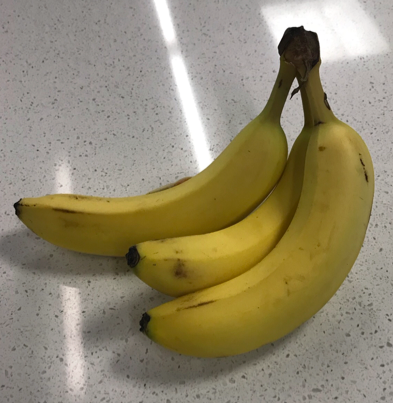

In [ ]:
from PIL import Image
Image.open('demo/banana.png')

### 准备模型文件

预训练模型通过配置文件和权重参数文件来定义。配置文件定义了模型结构，权重参数文件保存了训练好的模型参数。

在 GitHub 上 MMCls 通过不同的页面来提供预训练模型。
比如, MobileNetV2 的配置文件和权重参数文件就在这个链接下 [this page](https://github.com/open-mmlab/mmclassification/tree/master/configs/mobilenet_v2).

我们在安装 mmcls 时就已经将配置文件拿到了本地，但我们还需要手动下载模型权重参数文件。方便起见我们将权重参数文件统一保存到 `checkpoints` 文件夹下. 

In [ ]:
!mkdir checkpoints
!wget https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth -P checkpoints

--2021-04-19 12:28:08--  https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14206911 (14M) [application/octet-stream]
Saving to: ‘checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth’

mobilenet_v2_batch2 100%[===================>]  13.55M  7.54MB/s    in 1.8s    

2021-04-19 12:28:13 (7.54 MB/s) - ‘checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth’ saved [14206911/14206911]



最后，确保配置文件和参数文件都存在。

In [ ]:
!ls configs/mobilenet_v2/mobilenet_v2_b32x8_imagenet.py
!ls checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth

configs/mobilenet_v2/mobilenet_v2_b32x8_imagenet.py
checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth


### 图像分类

MMCls 提供了 high level APIs 用来进行推理计算. 

首先，我们构建模型。

In [ ]:
from mmcls.apis import inference_model, init_model, show_result_pyplot

# 指明配置文件和权重参数文件的路径
config_file = 'configs/mobilenet_v2/mobilenet_v2_b32x8_imagenet.py'
checkpoint_file = 'checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth'
# 指明设备，如果你没有开启 GPU，可以使用 CPU， `device='cpu'`.
device = 'cuda:0'
# device = 'cpu'
# 通过配置文件和权重参数文件构建模型
model = init_model(config_file, checkpoint_file, device=device)

Use load_from_local loader


/content/mmclassification/mmcls/apis/inference.py:44: UserWarning: Class names are not saved in the checkpoint's meta data, use imagenet by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


In [ ]:
model.__class__.__mro__

(mmcls.models.classifiers.image.ImageClassifier,
 mmcls.models.classifiers.base.BaseClassifier,
 torch.nn.modules.module.Module,
 object)

接着，展示示例图像的分类结果。 

In [ ]:
# Test a single image
img = 'demo/banana.png'
import mmcv
img_array =  mmcv.imread(img)
result = inference_model(model, img_array)

In [ ]:
result

{'pred_class': 'banana', 'pred_label': 954, 'pred_score': 0.9999284744262695}

可视化结果

/content/mmclassification/mmcls/models/classifiers/base.py:227: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


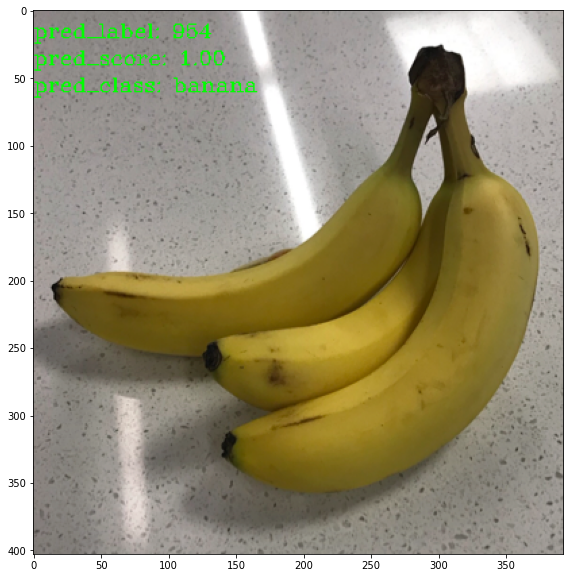

In [ ]:
# Show the results
show_result_pyplot(model, img, result)

## 模型微调

模型微调是将预训练好的模型在特定的数据集上对模型参数进行非常精细调整的过程，最终让预训练的模型能够适配新的数据集及对应的任务。相比于模型的训练过程，模型微调大大降低了训练的时间，并减少了数据量很小的数据集在训练过程中会出现的过拟合问题。

模型微调的基本步骤如下：

1. 准备新数据集
2. 让数据集能够满足 MMCls 的要求
3. 根据数据集创建配置文件 
4. 进行训练和验证

更多细节可以查看 [文档](https://github.com/open-mmlab/mmclassification/blob/master/docs/tutorials/new_dataset.md).



### 准备数据集并满足 MMCls 的要求

这里我们下载猫狗分类数据集，详细过程过程参考 MMClassification tools 教程

In [ ]:
# 25s
!wget https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0 -O cats_dogs_dataset.zip
!mkdir data
!unzip -q cats_dogs_dataset.zip -d ./data/

--2021-04-19 12:28:31--  https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip [following]
--2021-04-19 12:28:31--  https://www.dropbox.com/s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb432716e1187862a2fd4af6503.dl.dropboxusercontent.com/cd/0/inline/BM54WHgoEGDnbUWdBUqbfTCoNOGe7EW0Jz3BE_gNvFr0i9xnAKMT5efsFyMiAZ98SNuqlNO6MxXsE8Wvh45Ly1XPO2MZlKz5UZ_MvZa68FYjjJ3owXfXvbxVv2YTqEKnyg1P5Nx2yEITdbQY2K8wFcEG/file# [following]
--2021-04-19 12:28:31--  https://ucb432716e1187862a2fd4af6503.dl.dropboxusercontent.com/cd/0/inline/BM54WHgoEGDnbUWdBUqbfTCoNOGe7EW0Jz3BE_gN

### 根据数据集创建配置文件

详细过程说明参考 MMClassification tools 教程，这里我们直接配置好微调的配置文件。

In [ ]:
# Load the existing config file
from mmcv import Config
cfg = Config.fromfile('configs/mobilenet_v2/mobilenet_v2_b32x8_imagenet.py')

# Modify num classes of the model in classification head
cfg.model.head.num_classes = 2
cfg.model.head.topk = (1, )

# Modify the number of workers according to your computer
cfg.data.samples_per_gpu = 32
cfg.data.workers_per_gpu = 2

# Specify the path to training set
cfg.data.train.data_prefix = 'data/cats_dogs_dataset/training_set/training_set'
cfg.data.train.classes = 'data/cats_dogs_dataset/classes.txt'
# Specify the path to validation set
cfg.data.val.data_prefix = 'data/cats_dogs_dataset/val_set/val_set'
cfg.data.val.ann_file = 'data/cats_dogs_dataset/val.txt'
cfg.data.val.classes = 'data/cats_dogs_dataset/classes.txt'
# Specify the path to test set
cfg.data.test.data_prefix = 'data/cats_dogs_dataset/test_set/test_set'
cfg.data.test.ann_file = 'data/cats_dogs_dataset/test.txt'
cfg.data.test.classes = 'data/cats_dogs_dataset/classes.txt'

# Modify the metric method
cfg.evaluation['metric_options']={'topk': (1, )}

# Optimizer
cfg.optimizer = dict(type='SGD', lr=0.01, momentum=0.9, weight_decay=0.0001)
cfg.optimizer_config = dict(grad_clip=None)

# Learning policy
cfg.lr_config = dict(policy='step', step=[1])
cfg.runner = dict(type='EpochBasedRunner', max_epochs=2)

# Load the pretrained weights
cfg.load_from = 'checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth'
# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/cats_dogs_dataset'

from mmcls.apis import set_random_seed
# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)

cfg.gpu_ids = range(1)

### 模型微调

基于我们修改的配置文件，开始对我们的数据集进行模型微调计算。 我们调用 `train_model` API 进行计算. 

In [ ]:
import time
import mmcv
import os.path as osp

from mmcls.datasets import build_dataset
from mmcls.models import build_classifier
from mmcls.apis import train_model

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# Build the classifier
model = build_classifier(cfg.model)
# Build the dataset
datasets = [build_dataset(cfg.data.train)]
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES
# Begin finetuning
train_model(
    model,
    datasets,
    cfg,
    distributed=False,
    validate=True,
    timestamp=time.strftime('%Y%m%d_%H%M%S', time.localtime()),
    meta=dict())

2021-04-19 12:28:38,811 - mmcls - INFO - load checkpoint from checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth
2021-04-19 12:28:38,813 - mmcls - INFO - Use load_from_local loader
2021-04-19 12:28:38,849 - mmcls - WARNING - The model and loaded state dict do not match exactly

size mismatch for head.fc.weight: copying a param with shape torch.Size([1000, 1280]) from checkpoint, the shape in current model is torch.Size([2, 1280]).
size mismatch for head.fc.bias: copying a param with shape torch.Size([1000]) from checkpoint, the shape in current model is torch.Size([2]).
2021-04-19 12:28:38,850 - mmcls - INFO - Start running, host: root@d981c163c78c, work_dir: /content/mmclassification/work_dirs/cats_dogs_dataset
2021-04-19 12:28:38,852 - mmcls - INFO - workflow: [('train', 1)], max: 2 epochs
2021-04-19 12:29:00,370 - mmcls - INFO - Epoch [1][100/201]	lr: 1.000e-02, eta: 0:01:04, time: 0.214, data_time: 0.048, memory: 1709, top-1: 76.8438, loss: 0.6220
2021-04-19 12:29:19,

[                               ] 51/1601, 6.5 task/s, elapsed: 8s, ETA:   239s

2021-04-19 12:29:27,475 - mmcls - INFO - Epoch(val) [1][201]	accuracy_top-1: 68.7695
2021-04-19 12:29:48,821 - mmcls - INFO - Epoch [2][100/201]	lr: 1.000e-03, eta: 0:00:20, time: 0.212, data_time: 0.045, memory: 1709, top-1: 76.0000, loss: 0.4877
2021-04-19 12:30:07,825 - mmcls - INFO - Epoch [2][200/201]	lr: 1.000e-03, eta: 0:00:00, time: 0.190, data_time: 0.019, memory: 1709, top-1: 78.5938, loss: 0.4401
2021-04-19 12:30:07,885 - mmcls - INFO - Saving checkpoint at 2 epochs


[                               ] 51/1601, 6.4 task/s, elapsed: 8s, ETA:   242s

2021-04-19 12:30:15,937 - mmcls - INFO - Epoch(val) [2][201]	accuracy_top-1: 84.8220


验证一下训练好的模型

/content/mmclassification/mmcls/models/classifiers/base.py:227: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


<Figure size 576x432 with 0 Axes>

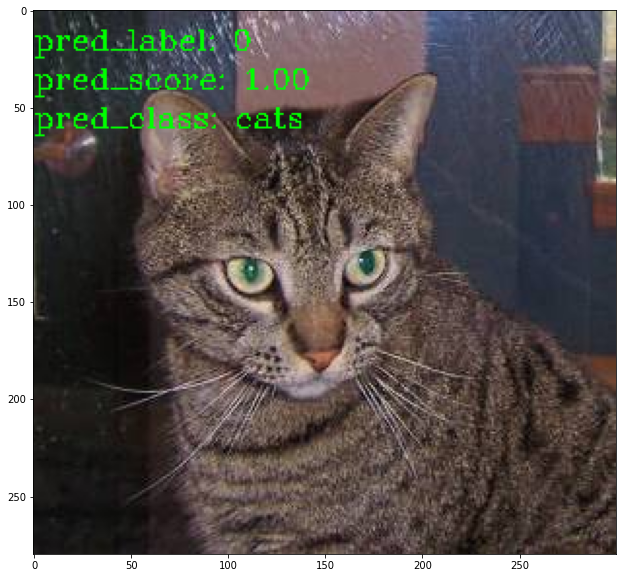

In [ ]:
import matplotlib.pyplot as plt


img = mmcv.imread('data/cats_dogs_dataset/training_set/training_set/cats/cat.1.jpg')

model.cfg = cfg
result = inference_model(model, img)

plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result)